# Carseats Data Format

A data frame with 400 observations on the following 11 variables.

- Sales:  Unit sales (in thousands) at each location

- CompPrice:  Price charged by competitor at each location

- Income: Community income level (in thousands of dollars)

- Advertising: Local advertising budget for company at each location (in thousands of dollars)

- Population: Population size in region (in thousands)

- Price: Price company charges for car seats at each site

- ShelveLoc: A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

- Age: Average age of the local population

- Education: Education level at each location

- Urban: A factor with levels No and Yes to indicate whether the store is in an urban or rural location

- US: A factor with levels No and Yes to indicate whether the store is in the US or not

In [137]:
# Imports

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import itertools
import seaborn as sns

from sklearn.datasets import load_boston

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn import tree

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

import statsmodels.api as sm

import graphviz
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from subprocess import call
from IPython.display import Image
import pydotplus


In [3]:
# Load Carseats data

data_in = pd.read_csv("Carseats.csv")

data_in.shape
data_in.dtypes
data_in.head(30)
data_in.tail()

(400, 11)

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [4]:
data_in.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ada1ac4e0>,
      dtype=object)

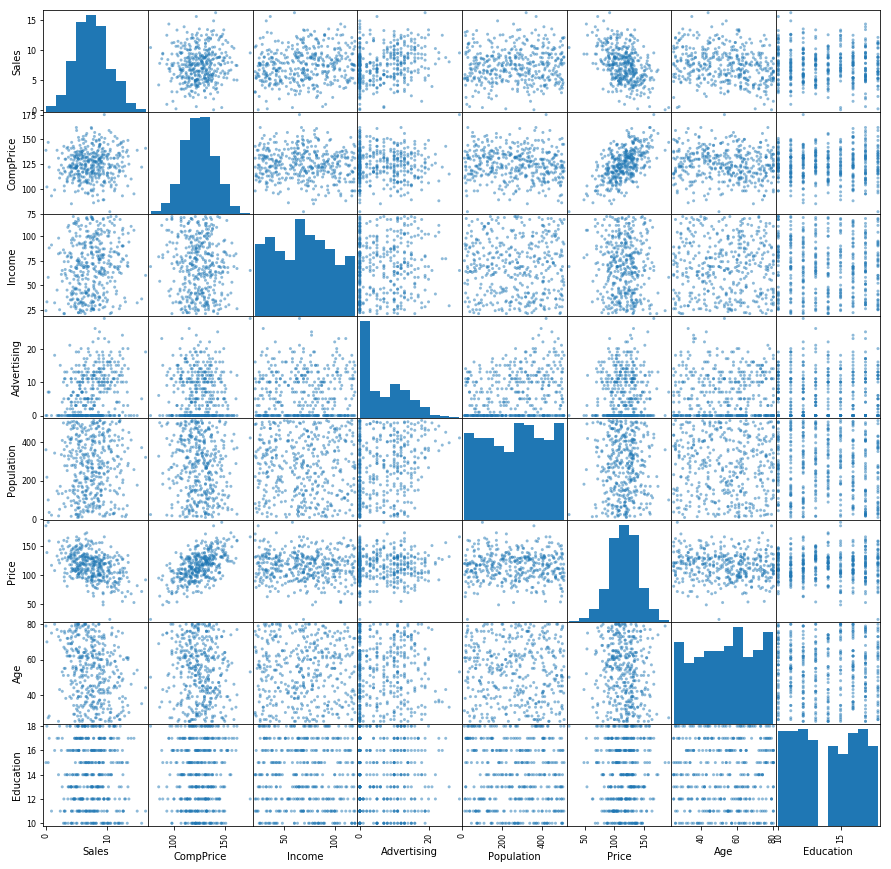

In [6]:
pd.plotting.scatter_matrix(data_in, figsize=[15, 15])

In [7]:
# Create binary field for high sales

data_in['High'] = np.where( data_in['Sales']<=8, "No", "Yes ")

data_in.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,No


# Decision Tree Classifier

Notes

The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.

The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and max_features=n_features, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed.

In [60]:
# labelencoder = LabelEncoder()

# # for i in range(*NUMBER OF FEATURES*):
# #     myData[:,i] = labelencoder.fit_transform(myData[:,i])

# X['ShelveLoc_encoded'] = labelencoder.fit_transform(X['ShelveLoc'])
# X['Urban_encoded'] = labelencoder.fit_transform(X['Urban'])
# X['US_encoded'] = labelencoder.fit_transform(X['US'])

# onehotencoder = OneHotEncoder()
# X = onehotencoder.fit_transform( X.drop(['ShelveLoc', 'Urban', 'US'], axis=1) )


X_dummies = pd.get_dummies(data_in[['ShelveLoc', 'Urban', 'US']])

X = pd.concat([ data_in[['CompPrice', 'Income', 'Advertising', 'Population', 'Price']], X_dummies ], axis=1)

# X = data_in[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']]
Y = data_in[['High']]

X.dtypes
X.head()

Y.dtypes
Y.head()

CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
ShelveLoc_Bad       uint8
ShelveLoc_Good      uint8
ShelveLoc_Medium    uint8
Urban_No            uint8
Urban_Yes           uint8
US_No               uint8
US_Yes              uint8
dtype: object

,CompPrice,Income,Advertising,Population,Price,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,1,0,0,0,1,0,1
1,111,48,16,260,83,0,1,0,0,1,0,1
2,113,35,10,269,80,0,0,1,0,1,0,1
3,117,100,4,466,97,0,0,1,0,1,0,1
4,141,64,3,340,128,1,0,0,0,1,1,0


High    object
dtype: object

,High
0,Yes
1,Yes
2,Yes
3,No
4,No


In [65]:
# Split into training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [66]:
# Fit model
clf = tree.DecisionTreeClassifier(min_samples_split=30, max_depth=30, min_samples_leaf=10)
clf = clf.fit(X_train, Y_train)

# Output tree attributes
print("Classes = ", clf.classes_)
print("Max Features = ", clf.max_features_)
print("No. of classes = ", clf.n_classes_)
print("No. of features when fit is performed = ", clf.n_features_ )
print("No. of outputs when fit is performed = ", clf.n_outputs_ )
print("Tree = ", clf.tree_ )

# Predict the response on the test set
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(Y_test, y_pred))

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

Classes =  ['No' 'Yes ']
Max Features =  12
No. of classes =  2
No. of features when fit is performed =  12
No. of outputs when fit is performed =  1
Tree =  <sklearn.tree._tree.Tree object at 0x7f3ad428d3d8>
Accuracy: 0.725
Accuracy of Decision Tree classifier on training set: 0.84
Accuracy of Decision Tree classifier on test set: 0.72


In [67]:
# # Export as dot file

# export_graphviz(clf, out_file='tree.dot', 
#                 feature_names = X.columns,
#                 class_names = Y['High'].unique(),
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# Image(filename = 'tree.png')

In [68]:
# # Visualising - method 2

# graph = Source(tree.export_graphviz(clf, out_file=None, 
#                                     feature_names=X.columns,
#                                     class_names = Y['High'].unique(),
#                                     rounded = True, precision = 2,filled = True))
# display(SVG(graph.pipe(format='svg')))

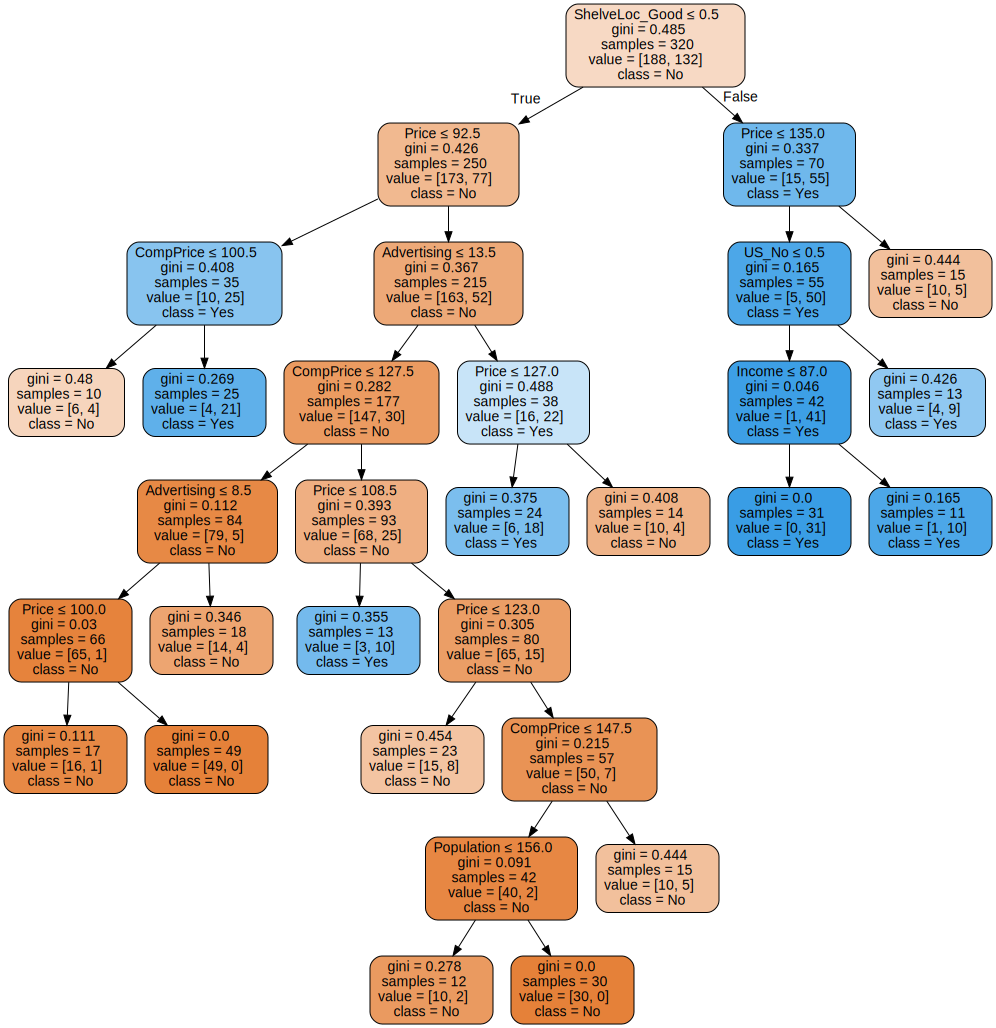

In [69]:
# Visualising - method 3

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=clf.classes_,  
                                filled=True, rounded=True, special_characters=True)  

graph = graphviz.Source(dot_data)

graph

True

True

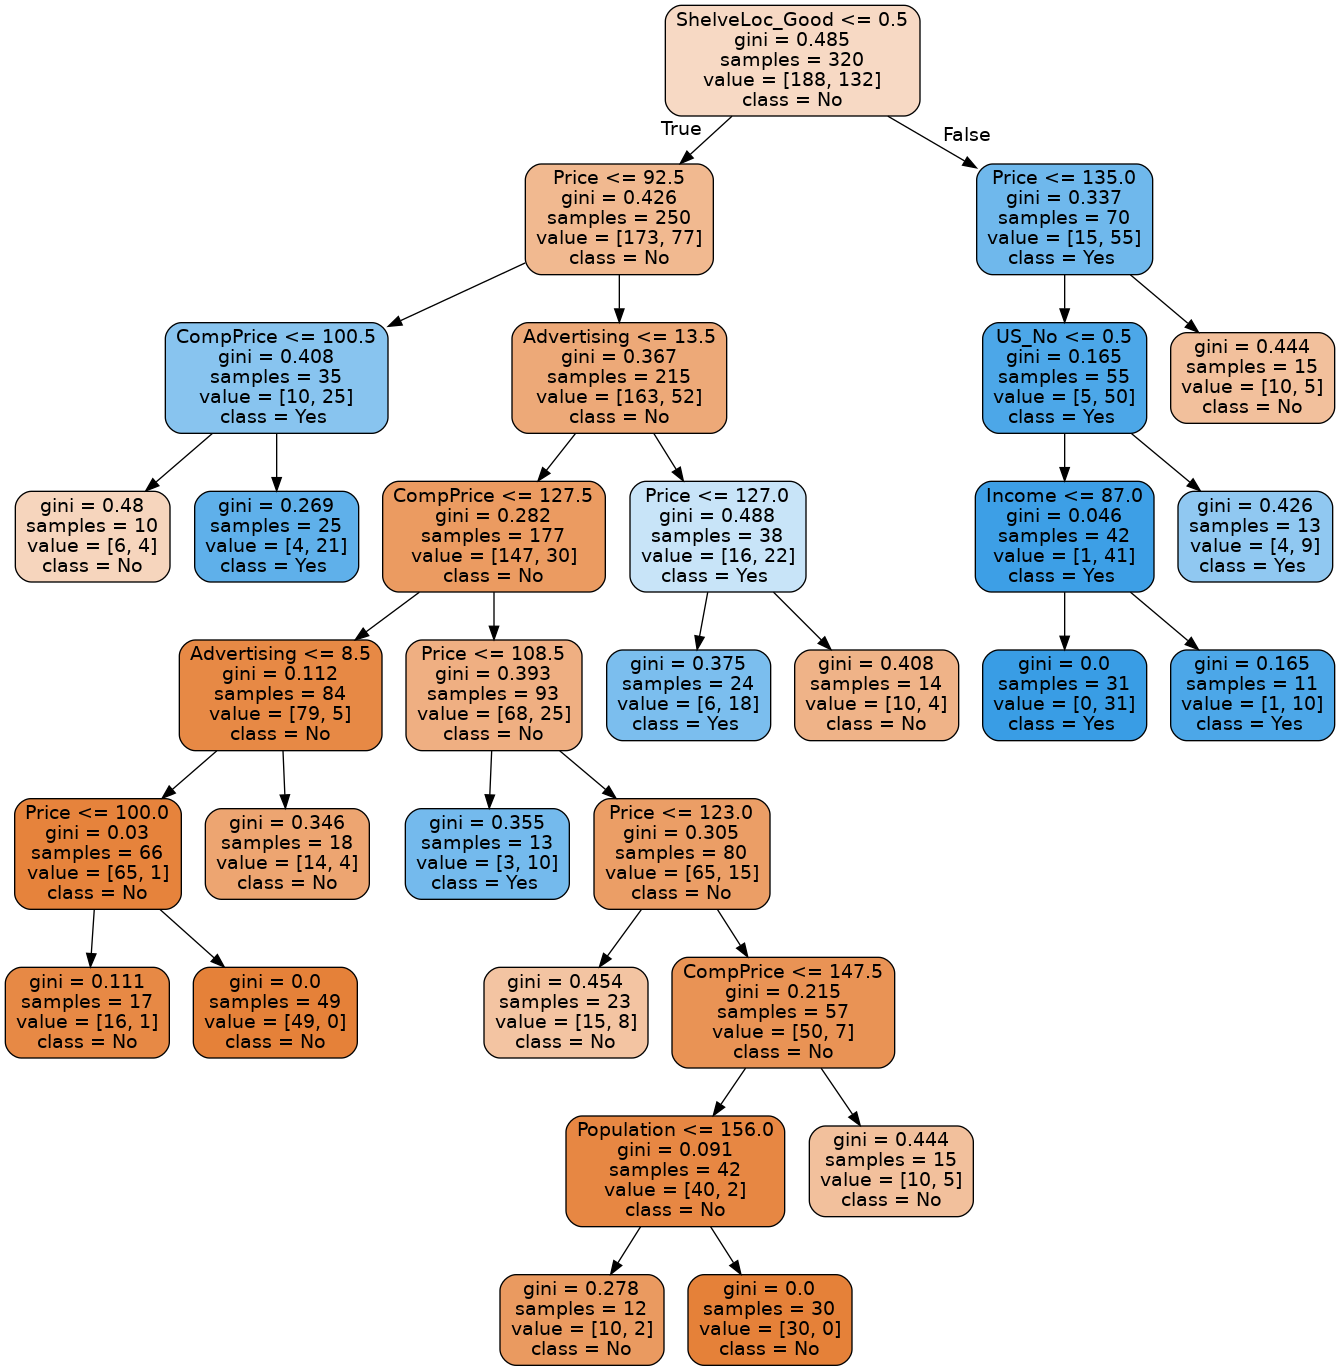

In [70]:
# Visualising method 4 - Export resulting tree to DOT source code string.
# Easiest if want to resize image

dot_data = export_graphviz(clf,feature_names=X.columns, class_names=clf.classes_, 
                           out_file=None, filled=True, rounded=True, proportion = False)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"5,5!"')
pydot_graph.write_png('resized_tree.png')

# Display in jupyter notebook
Image(filename = 'original_tree.png')

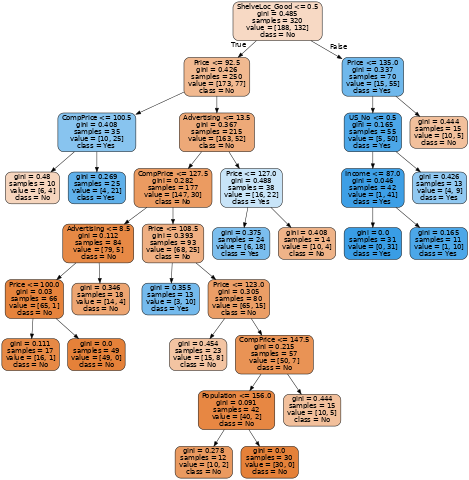

In [71]:
Image(filename = 'resized_tree.png')

# Cross Validation to select the tree depth

In [72]:
# Grid Search method

# parameters = {'max_depth':range(3,20)}
parameters = {'max_depth':range(3,20), 'min_samples_leaf':[10, 20, 30], 'min_samples_split':[10, 20, 30, 40, 80]}

clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X_train, y=Y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': range(3, 20), 'min_samples_leaf': [10, 20, 30], 'min_samples_split': [10, 20, 30, 40, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

0.7625 {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [73]:
# For loop method

depth = []
num_cv_splits = 3

for i in range(3,20):
    clf = tree.DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=10, max_depth=i)
    # Perform K-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=Y_train, cv=num_cv_splits, n_jobs=4)
    depth.append((i,scores.mean()))

for row in depth:
    print(row)

(3, 0.753071180861694)
(4, 0.7625345324163875)
(5, 0.7594192676188797)
(6, 0.7594192676188797)
(7, 0.7594192676188797)
(8, 0.7594192676188797)
(9, 0.7594192676188797)
(10, 0.7594192676188797)
(11, 0.7594192676188797)
(12, 0.7594192676188797)
(13, 0.7594192676188797)
(14, 0.7594192676188797)
(15, 0.7594192676188797)
(16, 0.7594192676188797)
(17, 0.7594192676188797)
(18, 0.7594192676188797)
(19, 0.7594192676188797)


Classes =  ['No' 'Yes ']
Max Features =  12
No. of classes =  2
No. of features when fit is performed =  12
No. of outputs when fit is performed =  1
Tree =  <sklearn.tree._tree.Tree object at 0x7f3ad645d100>
Accuracy: 0.675
Accuracy of Decision Tree classifier on training set: 0.819
Accuracy of Decision Tree classifier on test set: 0.675


True

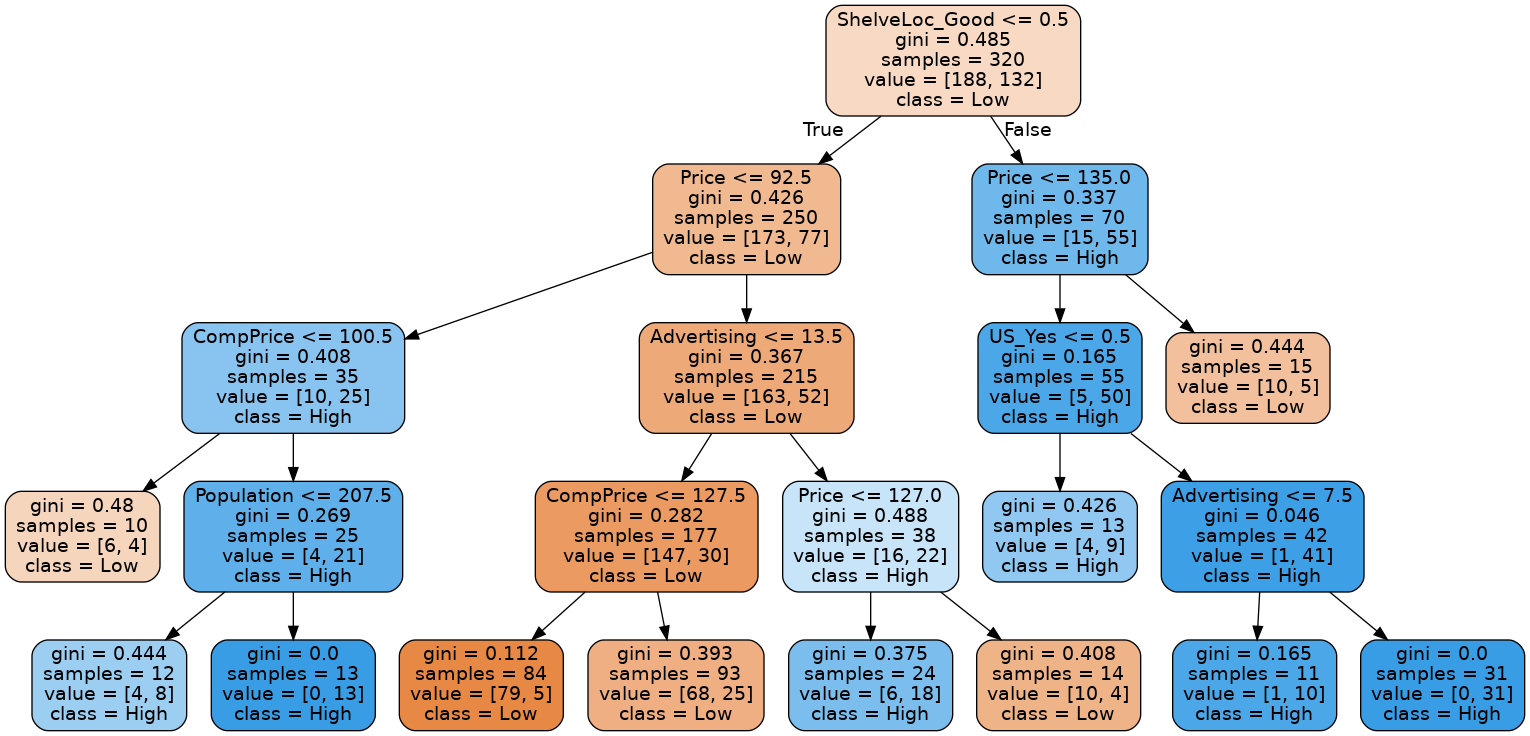

In [75]:
# Fit the model with max depth = 3

# Fit model
clf = tree.DecisionTreeClassifier(min_samples_split=10, max_depth=4, min_samples_leaf=10)
clf = clf.fit(X_train, Y_train)

# Output tree attributes
print("Classes = ", clf.classes_)
print("Max Features = ", clf.max_features_)
print("No. of classes = ", clf.n_classes_)
print("No. of features when fit is performed = ", clf.n_features_ )
print("No. of outputs when fit is performed = ", clf.n_outputs_ )
print("Tree = ", clf.tree_ )

# Predict the response on the test set
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(Y_test, y_pred))

print('Accuracy of Decision Tree classifier on training set: {:.3f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(clf.score(X_test, Y_test)))



# Visualising the tree
dot_data = export_graphviz(clf,feature_names=X.columns, class_names=['Low', 'High'], 
                           out_file=None, filled=True, rounded=True, proportion = False)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')

# Display in jupyter notebook
Image(filename = 'original_tree.png')

# Regression Tree (continuous output variable)

In [76]:
# Set up data

X_dummies = pd.get_dummies(data_in[['ShelveLoc', 'Urban', 'US']])

X = pd.concat([ data_in[['CompPrice', 'Income', 'Advertising', 'Population', 'Price']], X_dummies ], axis=1)

# X = data_in[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']]
Y = data_in[['Sales']]

X.dtypes
X.head()

Y.dtypes
Y.head()

CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
ShelveLoc_Bad       uint8
ShelveLoc_Good      uint8
ShelveLoc_Medium    uint8
Urban_No            uint8
Urban_Yes           uint8
US_No               uint8
US_Yes              uint8
dtype: object

,CompPrice,Income,Advertising,Population,Price,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,1,0,0,0,1,0,1
1,111,48,16,260,83,0,1,0,0,1,0,1
2,113,35,10,269,80,0,0,1,0,1,0,1
3,117,100,4,466,97,0,0,1,0,1,0,1
4,141,64,3,340,128,1,0,0,0,1,1,0


Sales    float64
dtype: object

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15


In [77]:
# Split into training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Max Features =  12
No. of features when fit is performed =  12
No. of outputs when fit is performed =  1
Tree =  <sklearn.tree._tree.Tree object at 0x7f3ad428d308>

Mean squared error on Training set = 2.27
Root Mean squared error on Training set = 1.51
Mean squared error on Test set = 5.30
Root Mean squared error on Test set = 2.30


True

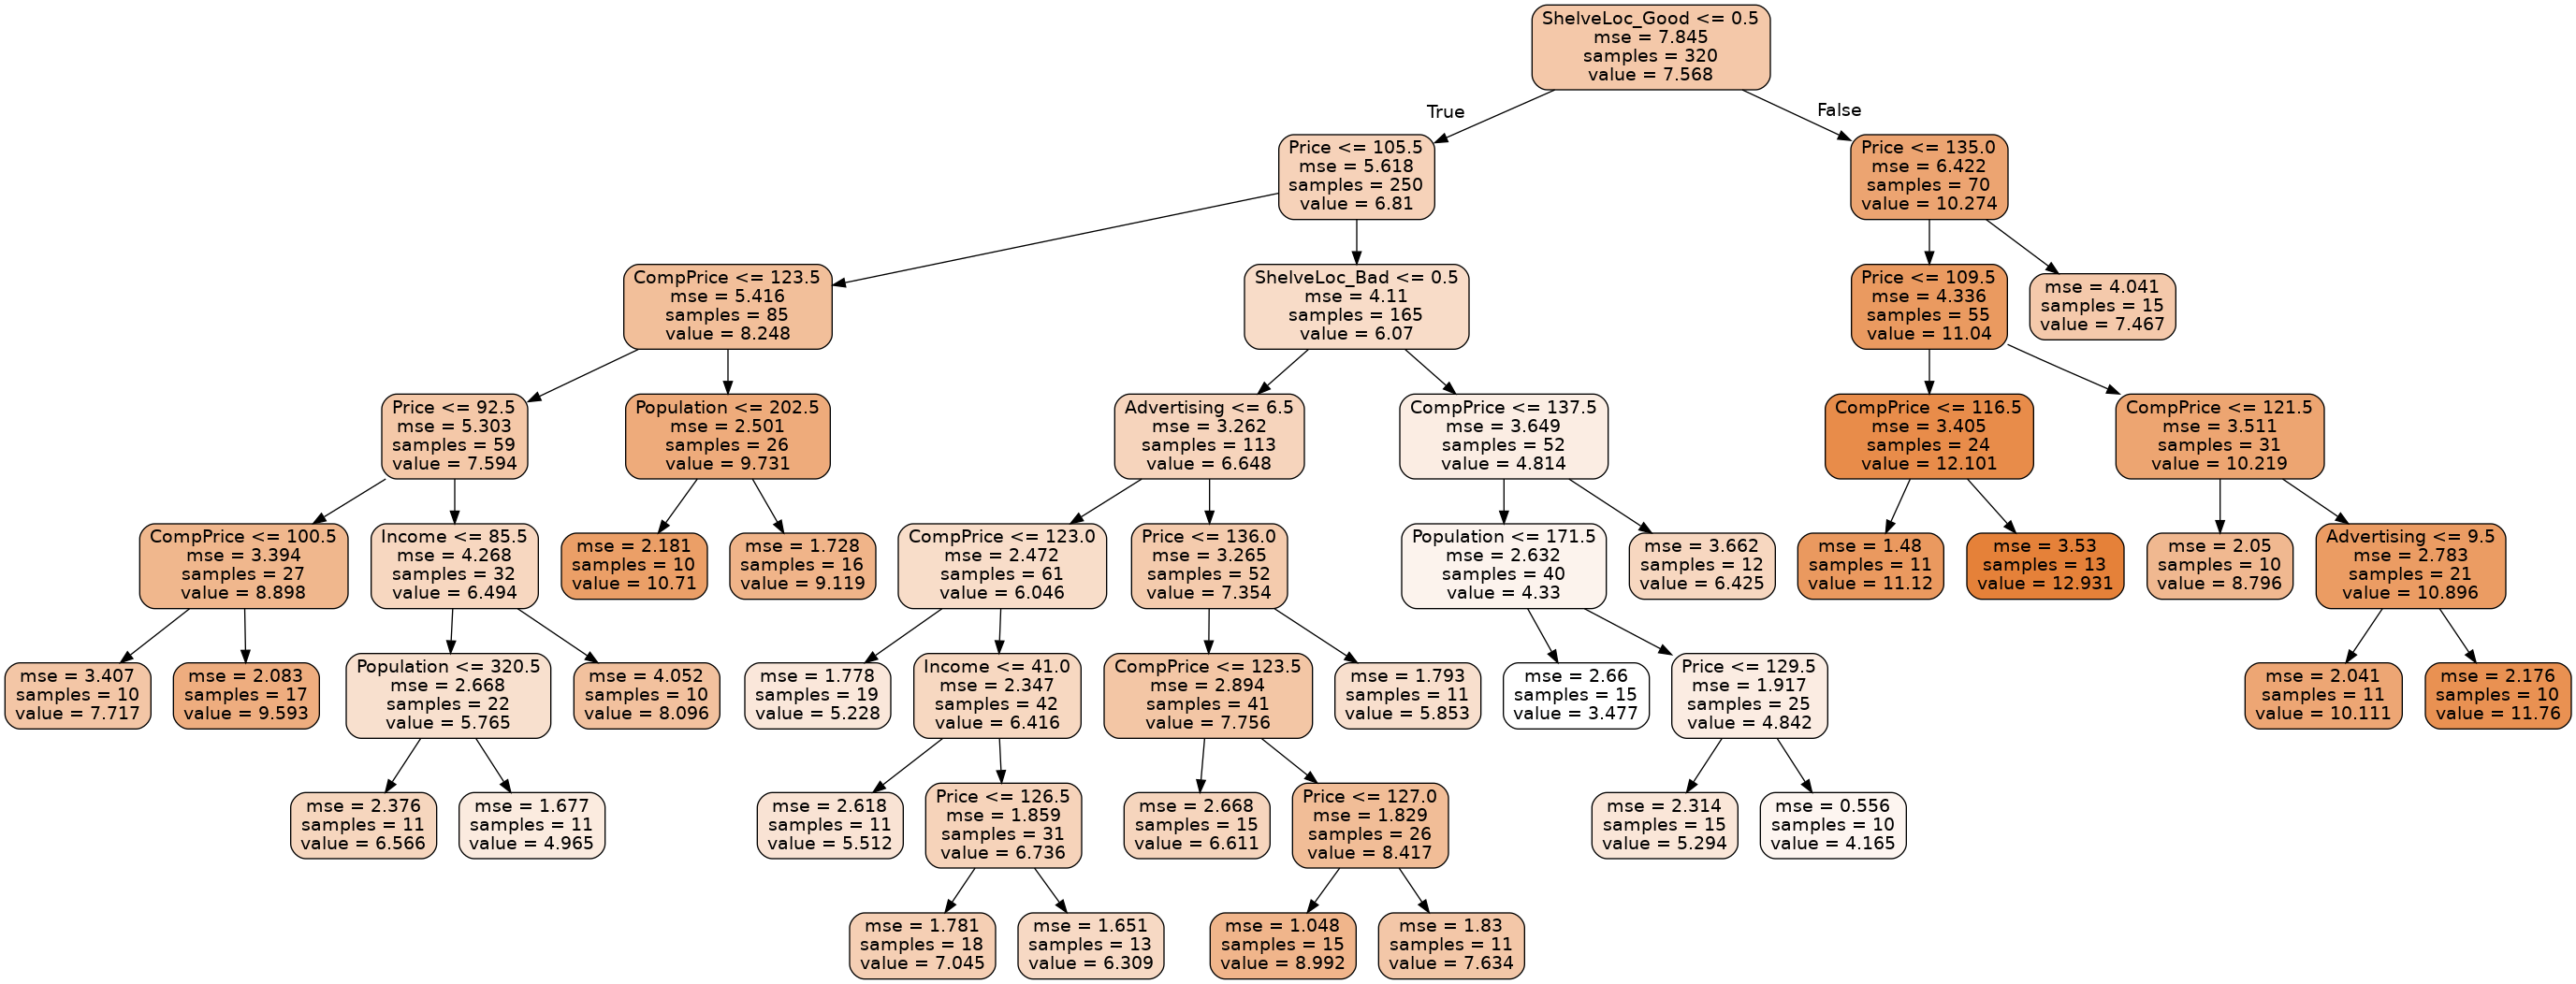

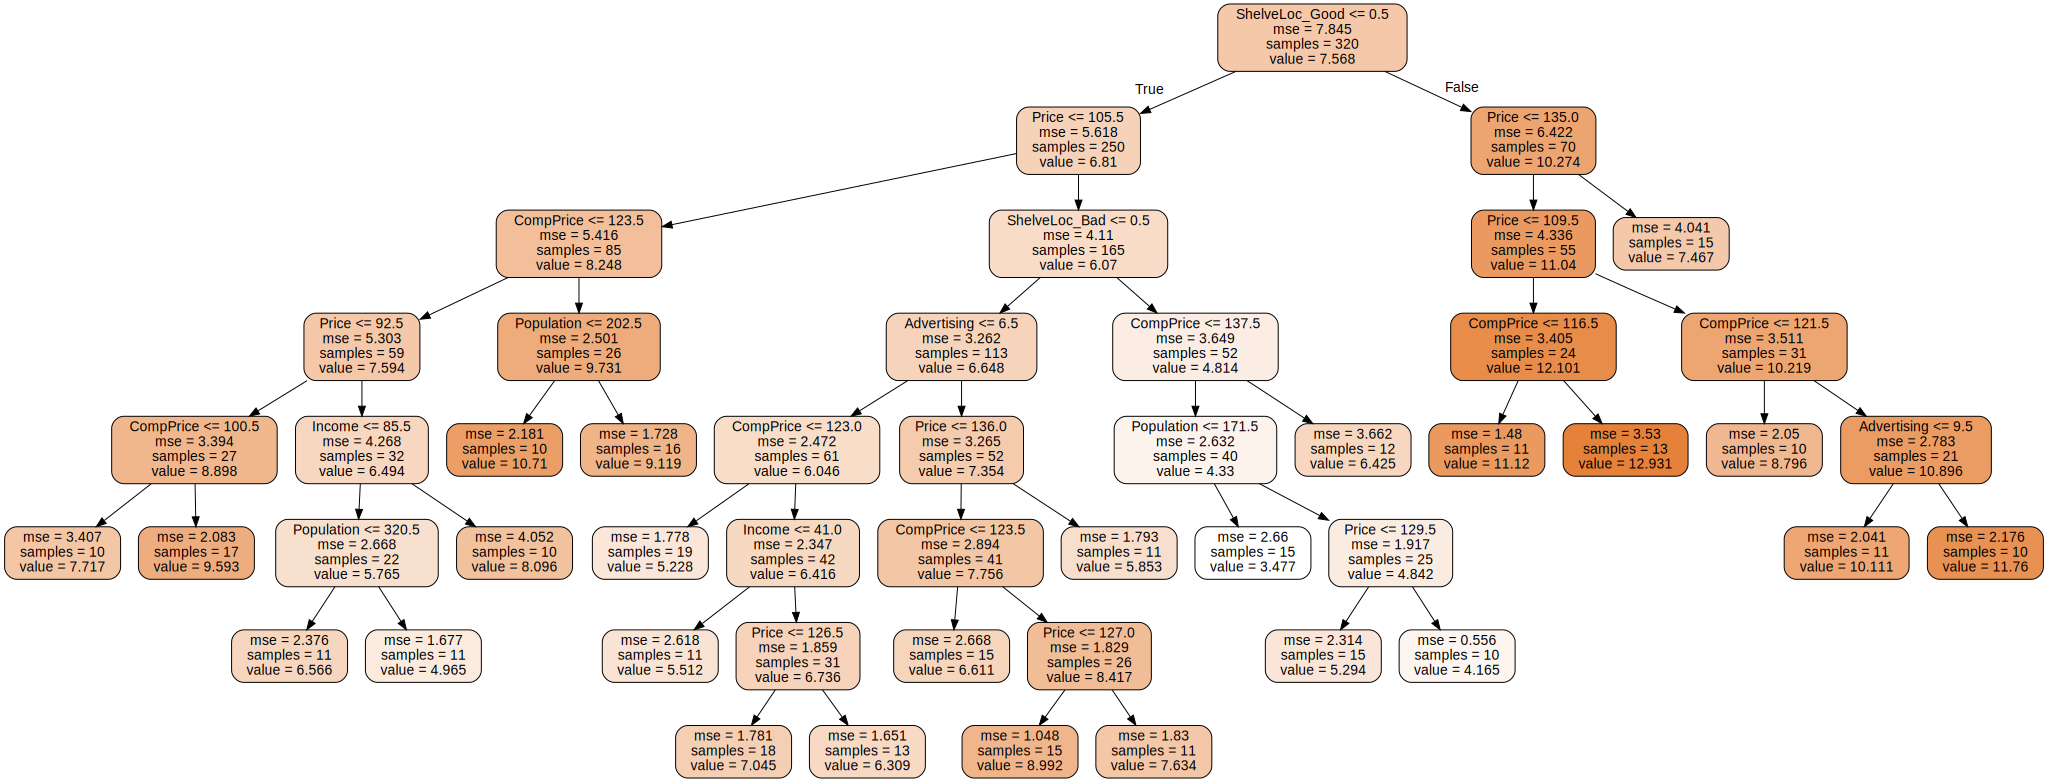

In [91]:
# Fit a model

# Fit model
clf = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=30, min_samples_leaf=10)
clf = clf.fit(X_train, Y_train)

# Output tree attributes
print("Max Features = ", clf.max_features_)
print("No. of features when fit is performed = ", clf.n_features_ )
print("No. of outputs when fit is performed = ", clf.n_outputs_ )
print("Tree = ", clf.tree_ )

# Predict the response on the test set
y_pred = clf.predict(X_test)

# MSE on training set
Y_train_pred = clf.predict(X_train)
print("\nMean squared error on Training set = %.2f" % mean_squared_error(Y_train, Y_train_pred))
print("Root Mean squared error on Training set = %.2f" % np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

# Predict on test set
Y_pred = clf.predict(X_test)
print("Mean squared error on Test set = %.2f" % mean_squared_error(Y_test, Y_pred))
print("Root Mean squared error on Test set = %.2f" % np.sqrt(mean_squared_error(Y_test, Y_pred)))


# Visualising the tree
dot_data = export_graphviz(clf,feature_names=X.columns, 
                           out_file=None, filled=True, rounded=True, proportion = False)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')

# Display in jupyter notebook
Image(filename = 'original_tree.png')


# Visualise tree - method 2
dot_data = export_graphviz(clf,feature_names=X.columns, 
                           out_file=None, filled=True, rounded=True, proportion = False)
graph = graphviz.Source(dot_data)  
graph 

In [92]:
# Grid Search Cross Validation method

# parameters = {'max_depth':range(3,20)}
parameters = {'max_depth':range(3,20), 'min_samples_leaf':[10, 20, 30], 'min_samples_split':[10, 20, 30, 40, 80]}

clf = GridSearchCV(tree.DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=X_train, y=Y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': range(3, 20), 'min_samples_leaf': [10, 20, 30], 'min_samples_split': [10, 20, 30, 40, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

0.42846242992955574 {'max_depth': 13, 'min_samples_leaf': 10, 'min_samples_split': 20}


Max Features =  12
No. of features when fit is performed =  12
No. of outputs when fit is performed =  1
Tree =  <sklearn.tree._tree.Tree object at 0x7f3acfaedd98>

Mean squared error on Training set = 2.27
Root Mean squared error on Training set = 1.51
Mean squared error on Test set = 5.30
Root Mean squared error on Test set = 2.30


True

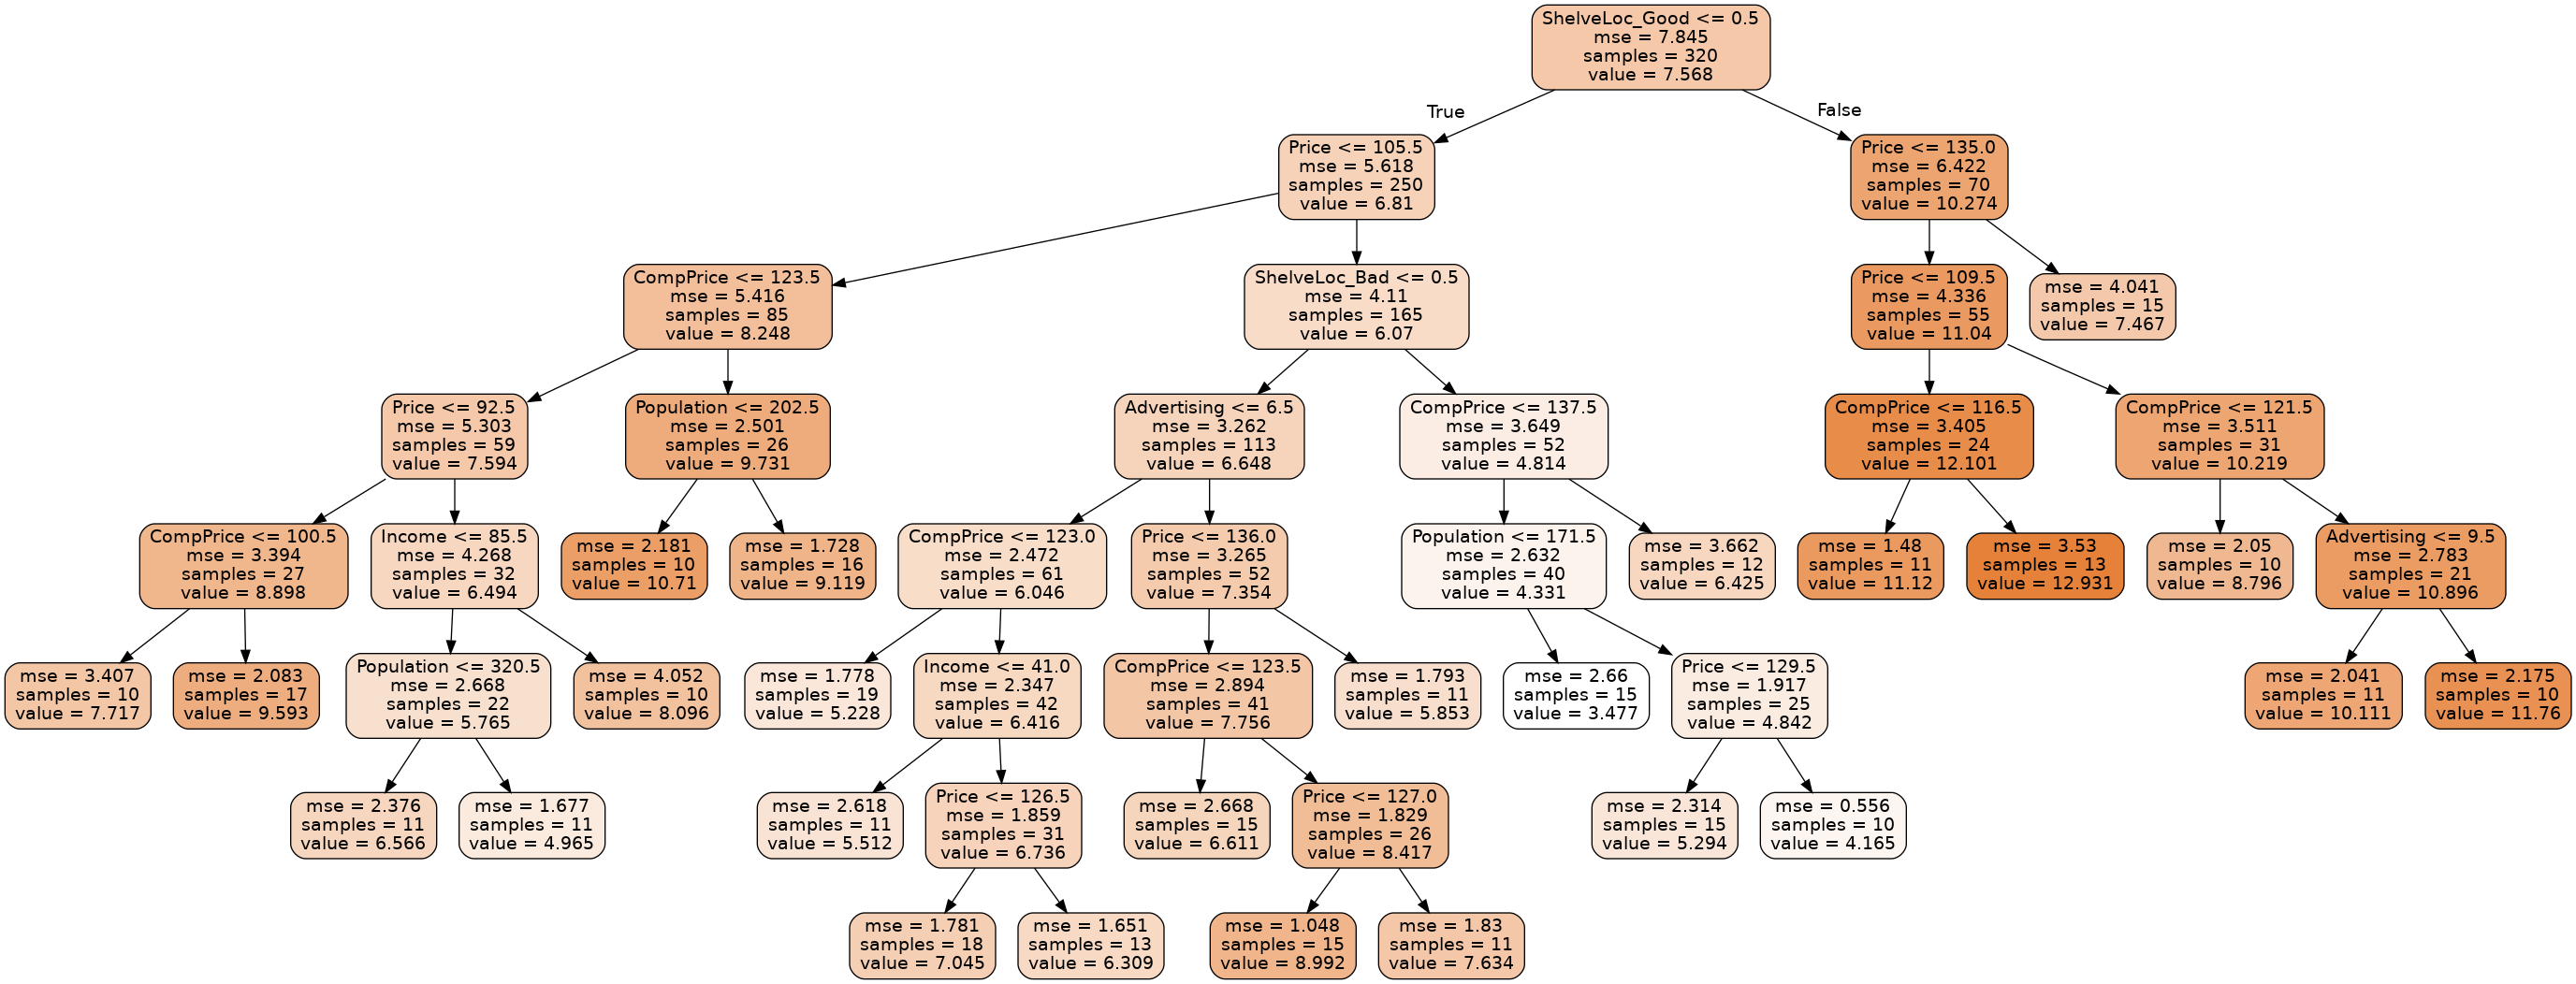

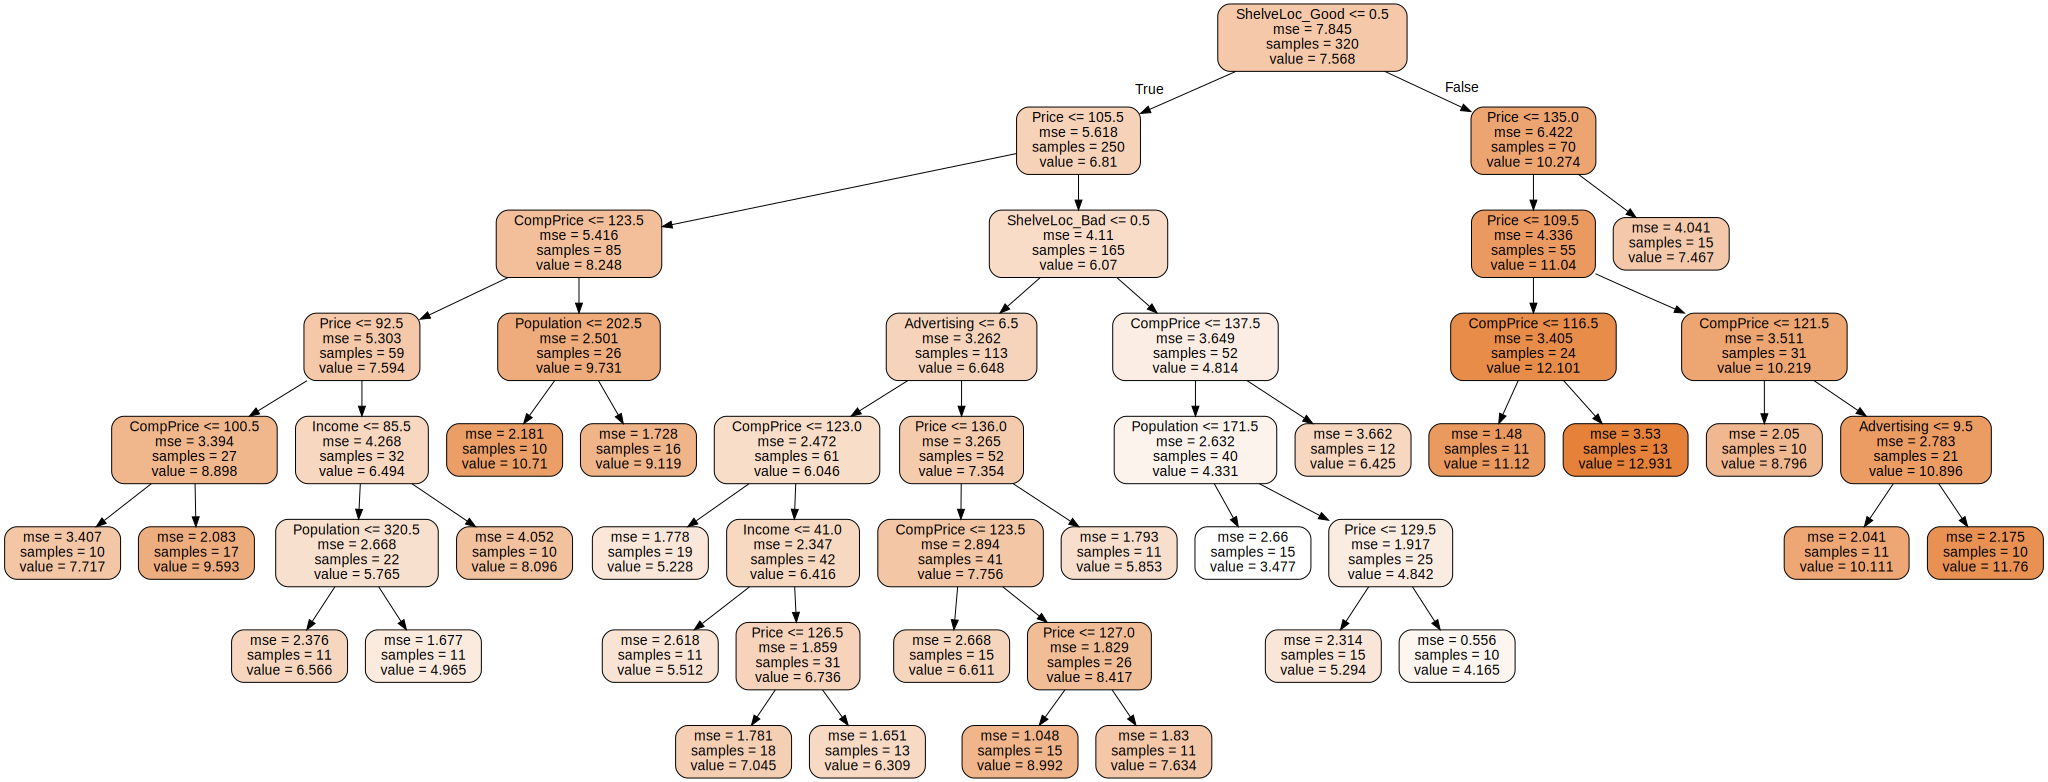

In [93]:
# Fit best model according to Grid Search CV

# Fit a model

# Fit model
clf = tree.DecisionTreeRegressor(min_samples_split=20, max_depth=13, min_samples_leaf=10)
clf = clf.fit(X_train, Y_train)

# Output tree attributes
print("Max Features = ", clf.max_features_)
print("No. of features when fit is performed = ", clf.n_features_ )
print("No. of outputs when fit is performed = ", clf.n_outputs_ )
print("Tree = ", clf.tree_ )

# Predict the response on the test set
y_pred = clf.predict(X_test)

# MSE on training set
Y_train_pred = clf.predict(X_train)
print("\nMean squared error on Training set = %.2f" % mean_squared_error(Y_train, Y_train_pred))
print("Root Mean squared error on Training set = %.2f" % np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

# Predict on test set
Y_pred = clf.predict(X_test)
print("Mean squared error on Test set = %.2f" % mean_squared_error(Y_test, Y_pred))
print("Root Mean squared error on Test set = %.2f" % np.sqrt(mean_squared_error(Y_test, Y_pred)))


# Visualising the tree
dot_data = export_graphviz(clf,feature_names=X.columns, 
                           out_file=None, filled=True, rounded=True, proportion = False)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')

# Display in jupyter notebook
Image(filename = 'original_tree.png')


# Visualise tree - method 2
dot_data = export_graphviz(clf,feature_names=X.columns, 
                           out_file=None, filled=True, rounded=True, proportion = False)
graph = graphviz.Source(dot_data)  
graph 

# Regression Tree on Boston Data (to compare to ISLR exercises)

Test set is 50% to match ISLR examples.

In [142]:
from sklearn.datasets import load_boston
boston = load_boston()

boston_df = pd.DataFrame(data=boston.data)
boston_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

type(boston_df)
boston_df.shape
boston_df.dtypes
boston_df.head()
boston_df.tail()



boston_target_df = pd.DataFrame(boston.target)

boston_target_df.columns = ['MEDV']

boston_target_df.shape
boston_target_df.head()

pandas.core.frame.DataFrame

(506, 13)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


(506, 1)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [143]:
# Set up data

X = boston_df.copy()
Y = boston_target_df.copy()

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

Max Features =  13
No. of features when fit is performed =  13
No. of outputs when fit is performed =  1
Tree =  <sklearn.tree._tree.Tree object at 0x7f3acd101f38>

Mean squared error on Training set = 12.44
Root Mean squared error on Training set = 3.53
Mean squared error on Test set = 23.09
Root Mean squared error on Test set = 4.81


True

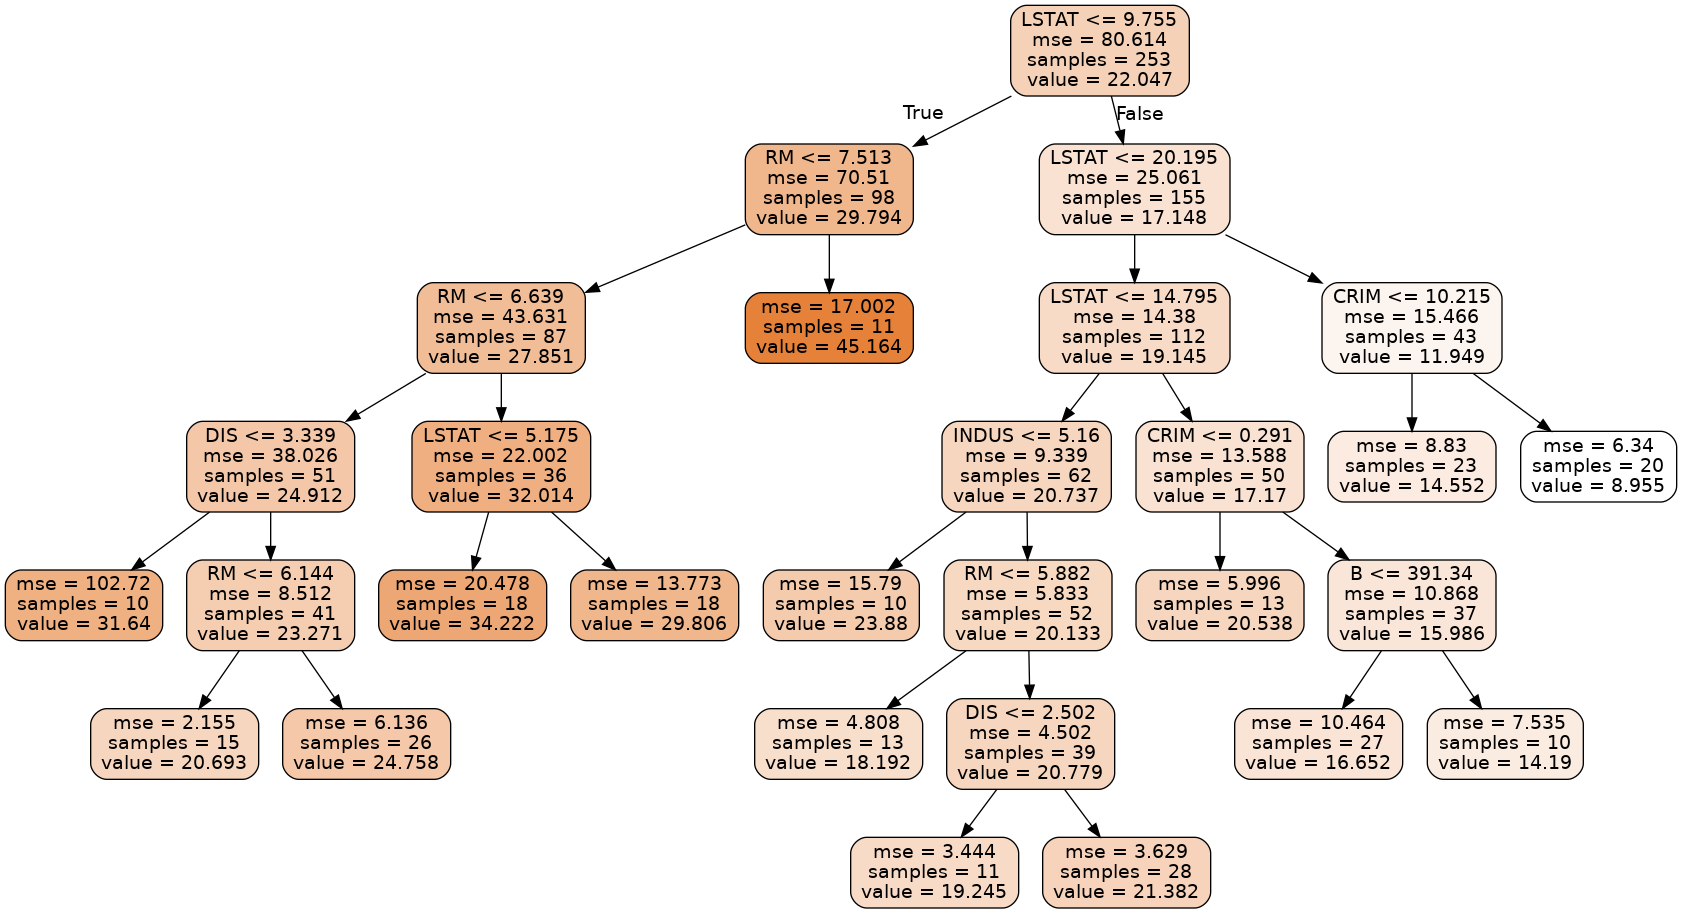

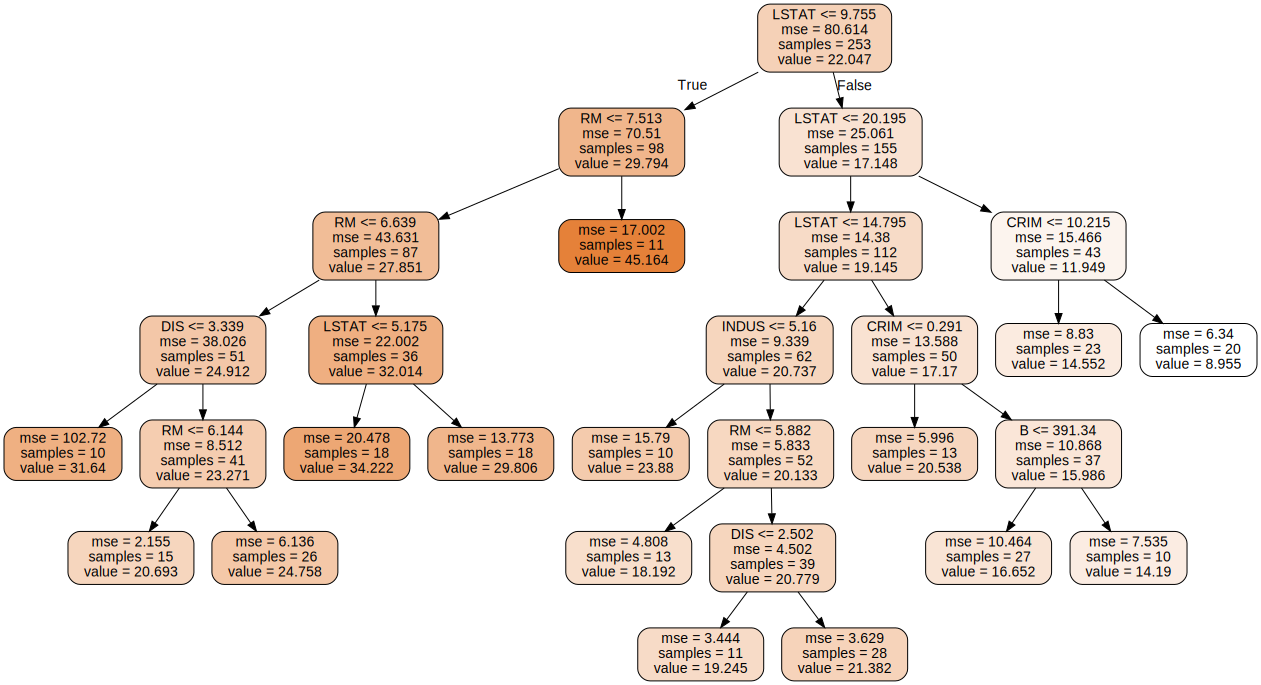

In [144]:
# Fit a model

# Fit model
clf = tree.DecisionTreeRegressor(min_samples_split=30, max_depth=30, min_samples_leaf=10)
clf = clf.fit(X_train, Y_train)

# Output tree attributes
print("Max Features = ", clf.max_features_)
print("No. of features when fit is performed = ", clf.n_features_ )
print("No. of outputs when fit is performed = ", clf.n_outputs_ )
print("Tree = ", clf.tree_ )

# Predict the response on the test set
y_pred = clf.predict(X_test)

# MSE on training set
Y_train_pred = clf.predict(X_train)
print("\nMean squared error on Training set = %.2f" % mean_squared_error(Y_train, Y_train_pred))
print("Root Mean squared error on Training set = %.2f" % np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

# Predict on test set
Y_pred = clf.predict(X_test)
print("Mean squared error on Test set = %.2f" % mean_squared_error(Y_test, Y_pred))
print("Root Mean squared error on Test set = %.2f" % np.sqrt(mean_squared_error(Y_test, Y_pred)))


# Visualising the tree
dot_data = export_graphviz(clf,feature_names=X.columns, 
                           out_file=None, filled=True, rounded=True, proportion = False)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')

# Display in jupyter notebook
Image(filename = 'original_tree.png')


# Visualise tree - method 2
dot_data = export_graphviz(clf,feature_names=X.columns, 
                           out_file=None, filled=True, rounded=True, proportion = False)
graph = graphviz.Source(dot_data)  
graph 

In [145]:
# Grid Search Cross Validation method

# parameters = {'max_depth':range(3,20)}
parameters = {'max_depth':range(3,20), 'min_samples_leaf':[10, 20, 30], 'min_samples_split':[10, 20, 30, 40, 80]}

clf = GridSearchCV(tree.DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=X_train, y=Y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': range(3, 20), 'min_samples_leaf': [10, 20, 30], 'min_samples_split': [10, 20, 30, 40, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

0.6280432156763888 {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Max Features =  13
No. of features when fit is performed =  13
No. of outputs when fit is performed =  1
Tree =  <sklearn.tree._tree.Tree object at 0x7f3ad4387370>

Mean squared error on Training set = 12.15
Root Mean squared error on Training set = 3.49
Mean squared error on Test set = 22.52
Root Mean squared error on Test set = 4.75


True

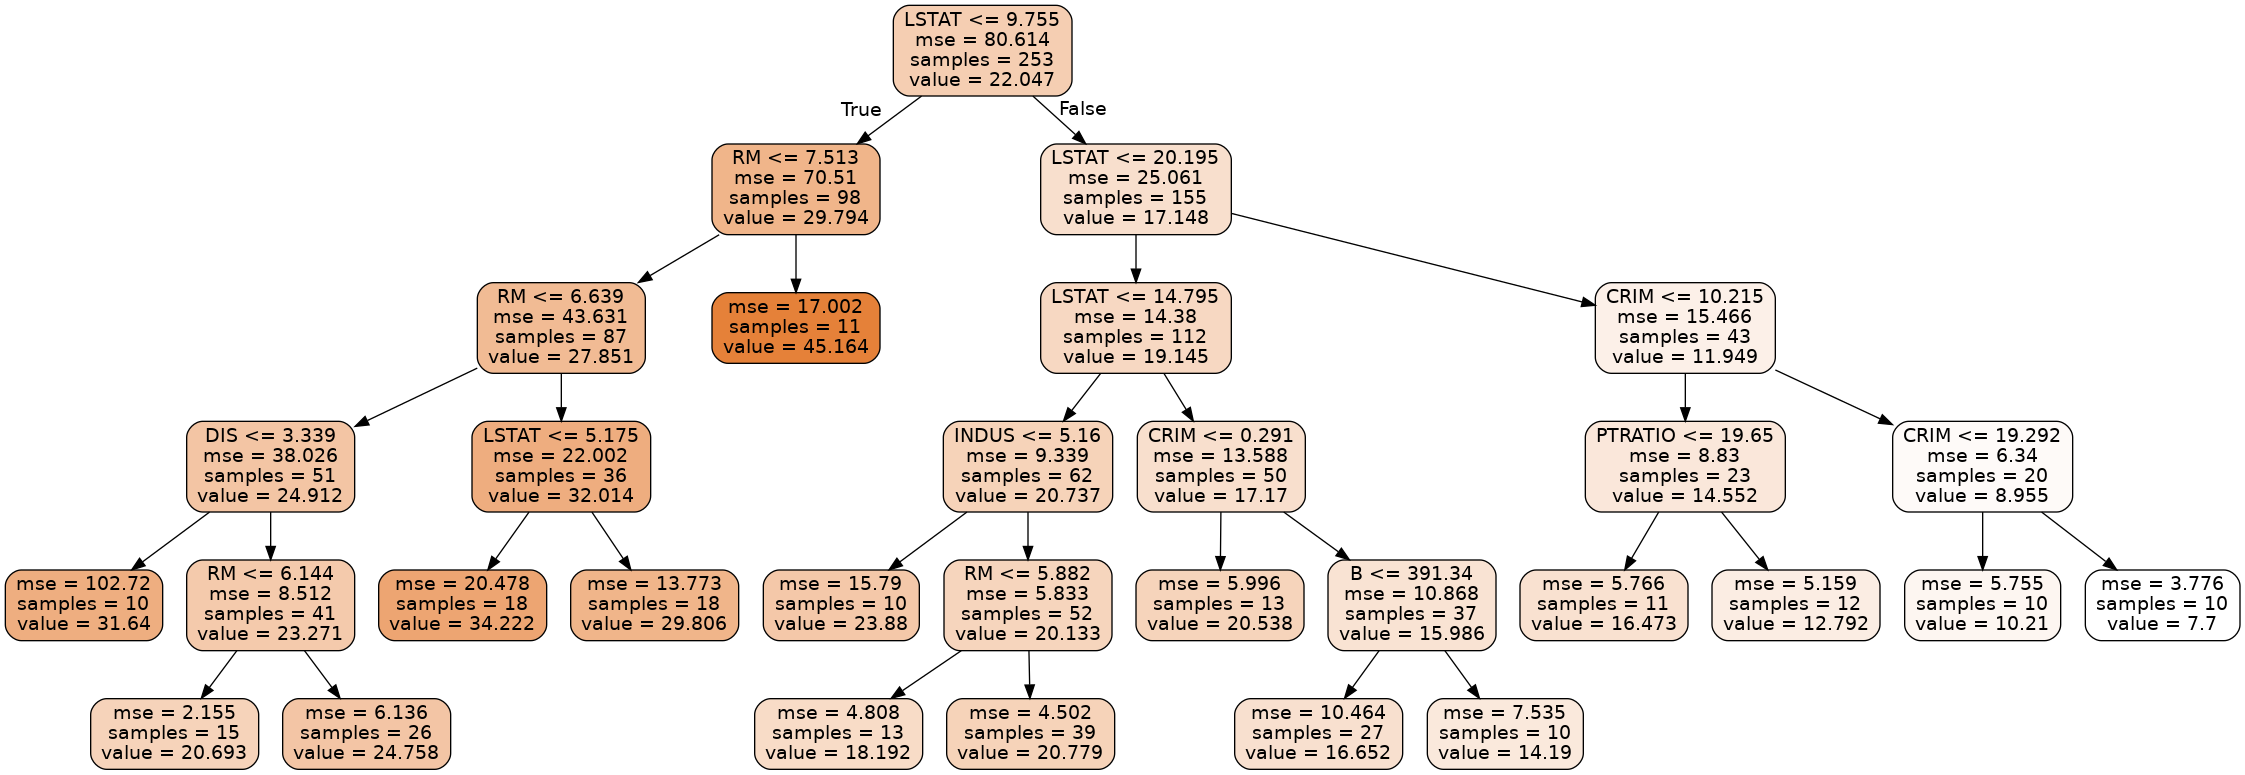

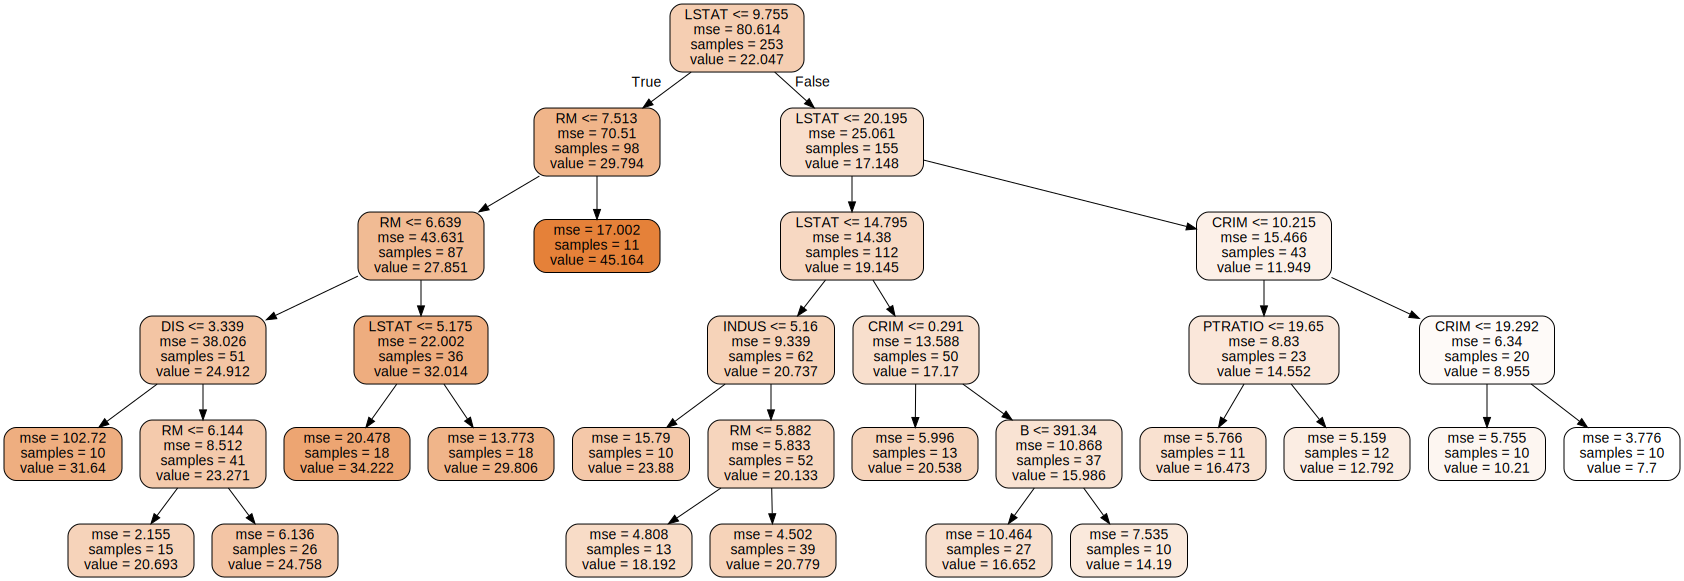

In [147]:
# Fit best model according to Grid Search CV

clf = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=5, min_samples_leaf=10)
clf.fit(X_train, Y_train)

# Output tree attributes
print("Max Features = ", clf.max_features_)
print("No. of features when fit is performed = ", clf.n_features_ )
print("No. of outputs when fit is performed = ", clf.n_outputs_ )
print("Tree = ", clf.tree_ )

# Predict the response on the test set
y_pred = clf.predict(X_test)

# MSE on training set
Y_train_pred = clf.predict(X_train)
print("\nMean squared error on Training set = %.2f" % mean_squared_error(Y_train, Y_train_pred))
print("Root Mean squared error on Training set = %.2f" % np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

# Predict on test set
Y_pred = clf.predict(X_test)
print("Mean squared error on Test set = %.2f" % mean_squared_error(Y_test, Y_pred))
print("Root Mean squared error on Test set = %.2f" % np.sqrt(mean_squared_error(Y_test, Y_pred)))


# Visualising the tree
dot_data = export_graphviz(clf,feature_names=X.columns, 
                           out_file=None, filled=True, rounded=True, proportion = False)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')

# Display in jupyter notebook
Image(filename = 'original_tree.png')


# Visualise tree - method 2
dot_data = export_graphviz(clf,feature_names=X.columns, 
                           out_file=None, filled=True, rounded=True, proportion = False)
graph = graphviz.Source(dot_data)  
graph 

# Bagging and Random Forest

In [148]:
# Set up data

boston = load_boston()

boston_df = pd.DataFrame(data=boston.data)
boston_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

type(boston_df)
boston_df.shape
boston_df.dtypes
boston_df.head()
boston_df.tail()



boston_target_df = pd.DataFrame(boston.target)

boston_target_df.columns = ['MEDV']

boston_target_df.shape
boston_target_df.head()


# Set up data

X = boston_df.copy()
Y = boston_target_df.copy()

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

pandas.core.frame.DataFrame

(506, 13)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


(506, 1)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Bagging

In [149]:
# Fit BAGGING model

# clf = BaggingRegressor(n_estimators=100, random_state=1, max_features=3)
clf = BaggingRegressor(n_estimators=100, random_state=1)
clf.fit(X_train, Y_train)

# Output tree attributes
# print("Collection of estimators: ", clf.estimators_)
# print("Feature Importances: ", clf.feature_importances_)
print("No. of features when fit is performed = ", clf.n_features_ )
# print("No. of outputs when fit is performed = ", clf.n_outputs_ )
# print("Out Of Bag score on training set = ", clf.oob_score_ )
# print("Out Of Bag prediction on training set = ", clf.oob_prediction_ )

# Predict the response on the test set
y_pred = clf.predict(X_test)

# MSE on training set
Y_train_pred = clf.predict(X_train)
print("\nMean squared error on Training set = %.2f" % mean_squared_error(Y_train, Y_train_pred))
print("Root Mean squared error on Training set = %.2f" % np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

# Predict on test set
Y_pred = clf.predict(X_test)
print("Mean squared error on Test set = %.2f" % mean_squared_error(Y_test, Y_pred))
print("Root Mean squared error on Test set = %.2f" % np.sqrt(mean_squared_error(Y_test, Y_pred)))

/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
         verbose=0, warm_start=False)

No. of features when fit is performed =  13

Mean squared error on Training set = 2.37
Root Mean squared error on Training set = 1.54
Mean squared error on Test set = 12.03
Root Mean squared error on Test set = 3.47


## Random Forest

/home/stuart/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

No. of features when fit is performed =  13
No. of outputs when fit is performed =  1

Mean squared error on Training set = 2.27
Root Mean squared error on Training set = 1.51
Mean squared error on Test set = 12.02
Root Mean squared error on Test set = 3.47


,0,Importance
12,LSTAT,0.556881
5,RM,0.259474
7,DIS,0.049955
0,CRIM,0.039032
4,NOX,0.020006
6,AGE,0.016691
9,TAX,0.016648
11,B,0.013724
2,INDUS,0.010856
10,PTRATIO,0.010180


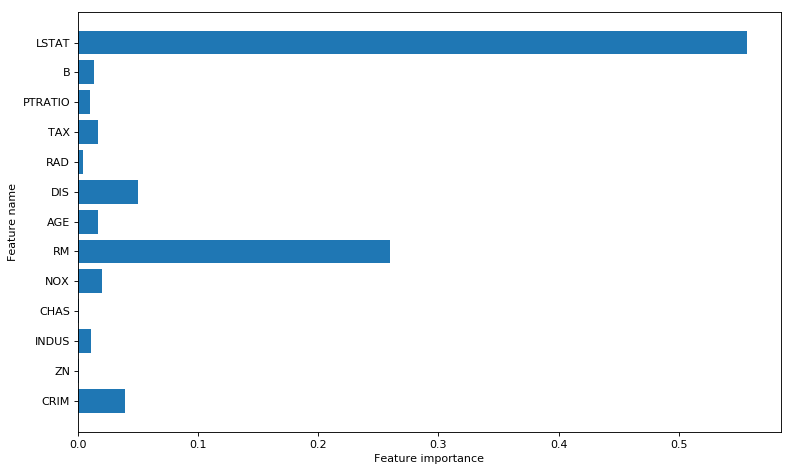

In [150]:
# Fit RANDOM FOREST model

# clf = RandomForestRegressor(n_estimators=100, random_state=1, max_depth=3, min_samples_split=10, min_samples_leaf=10)
clf = RandomForestRegressor(n_estimators=100, random_state=1)
clf.fit(X_train, Y_train)

# Output tree attributes
# print("Collection of estimators: ", clf.estimators_)
# print("Feature Importances: ", clf.feature_importances_)
print("No. of features when fit is performed = ", clf.n_features_ )
print("No. of outputs when fit is performed = ", clf.n_outputs_ )
# print("Out Of Bag score on training set = ", clf.oob_score_ )
# print("Out Of Bag prediction on training set = ", clf.oob_prediction_ )

# Predict the response on the test set
y_pred = clf.predict(X_test)

# MSE on training set
Y_train_pred = clf.predict(X_train)
print("\nMean squared error on Training set = %.2f" % mean_squared_error(Y_train, Y_train_pred))
print("Root Mean squared error on Training set = %.2f" % np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

# Predict on test set
Y_pred = clf.predict(X_test)
print("Mean squared error on Test set = %.2f" % mean_squared_error(Y_test, Y_pred))
print("Root Mean squared error on Test set = %.2f" % np.sqrt(mean_squared_error(Y_test, Y_pred)))


# Plot the feature importances
feature_importance_df = pd.DataFrame(X.columns)
feature_importance_df['Importance'] =  clf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False)

fig=plt.figure(figsize=(10,6),dpi=80)
fig=plt.barh(X.columns, clf.feature_importances_)
fig=plt.xlabel("Feature importance")
fig=plt.ylabel("Feature name")
fig=plt.yticks(np.arange(len(X.columns)), X.columns)
fig=plt.tight_layout()

/home/stuart/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

No. of features when fit is performed =  13
No. of outputs when fit is performed =  1

Mean squared error on Training set = 2.27
Root Mean squared error on Training set = 1.51
Mean squared error on Test set = 12.02
Root Mean squared error on Test set = 3.47


,0,Importance
12,LSTAT,0.556881
5,RM,0.259474
7,DIS,0.049955
0,CRIM,0.039032
4,NOX,0.020006
6,AGE,0.016691
9,TAX,0.016648
11,B,0.013724
2,INDUS,0.010856
10,PTRATIO,0.010180


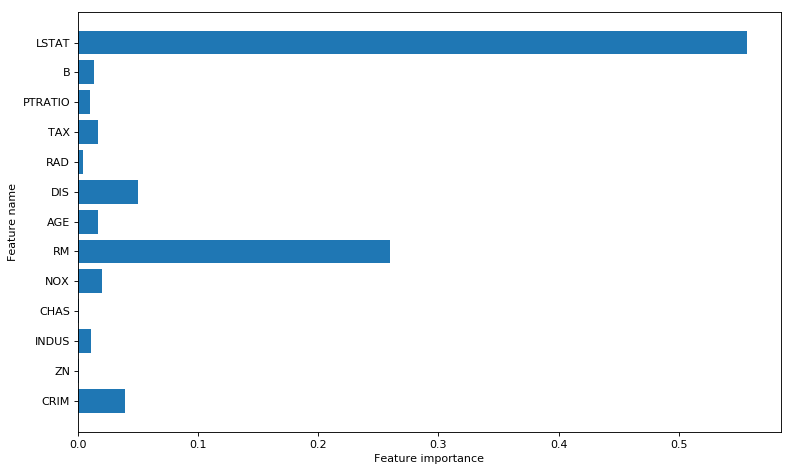

In [152]:
# Fit RANDOM FOREST model

# clf = RandomForestRegressor(n_estimators=100, random_state=1, max_depth=3, min_samples_split=10, min_samples_leaf=10)
# clf = RandomForestRegressor(n_estimators=100, random_state=1,max_features=1)
clf = RandomForestRegressor(n_estimators=100, random_state=1)
clf.fit(X_train, Y_train)

# Output tree attributes
# print("Collection of estimators: ", clf.estimators_)
# print("Feature Importances: ", clf.feature_importances_)
print("No. of features when fit is performed = ", clf.n_features_ )
print("No. of outputs when fit is performed = ", clf.n_outputs_ )
# print("Out Of Bag score on training set = ", clf.oob_score_ )
# print("Out Of Bag prediction on training set = ", clf.oob_prediction_ )

# Predict the response on the test set
y_pred = clf.predict(X_test)

# MSE on training set
Y_train_pred = clf.predict(X_train)
print("\nMean squared error on Training set = %.2f" % mean_squared_error(Y_train, Y_train_pred))
print("Root Mean squared error on Training set = %.2f" % np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

# Predict on test set
Y_pred = clf.predict(X_test)
print("Mean squared error on Test set = %.2f" % mean_squared_error(Y_test, Y_pred))
print("Root Mean squared error on Test set = %.2f" % np.sqrt(mean_squared_error(Y_test, Y_pred)))


# Plot the feature importances
feature_importance_df = pd.DataFrame(X.columns)
feature_importance_df['Importance'] =  clf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False)

fig=plt.figure(figsize=(10,6),dpi=80)
fig=plt.barh(X.columns, clf.feature_importances_)
fig=plt.xlabel("Feature importance")
fig=plt.ylabel("Feature name")
fig=plt.yticks(np.arange(len(X.columns)), X.columns)
fig=plt.tight_layout()

# Boosting

/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

Deviance (= loss) of the model at iteration i on the in-bag sample:  [68.27106064 57.50042947 49.07297393 41.58428082 35.93239112 30.9818494
 26.6668573  23.0956566  20.24124606 17.87303856 15.89053347 14.14843846
 12.70040857 11.44142529 10.44589748  9.53926754  8.75875355  8.11958523
  7.56173653  7.08596334  6.66484354  6.26622434  5.96306633  5.61859555
  5.34467573  5.12148642  4.91719086  4.69327838  4.5394128   4.36304426
  4.22657293  4.11030828  3.94709705  3.84616748  3.70092874  3.57291356
  3.47789189  3.36812852  3.26076477  3.18569256  3.01377322  2.93602011
  2.87911976  2.81825377  2.69206142  2.64755614  2.59449619  2.5441152
  2.48904442  2.45490363  2.41698155  2.36868621  2.30549531  2.22107882
  2.19172877  2.15921089  2.1220116   2.08770148  2.0387866   2.00926344
  1.96890115  1.94775054  1.92176989  1.89156157  1.85712628  1.81610503
  1.79440447  1.75248079  1.70623934  1.64641711  1.62874629  1.57308529
  1.53987005  1.50979158  1.48354771  1.47396471  1.45132

,0,Importance
5,RM,0.190590
7,DIS,0.157046
12,LSTAT,0.127590
11,B,0.111518
0,CRIM,0.108089
6,AGE,0.101198
9,TAX,0.062590
10,PTRATIO,0.043141
4,NOX,0.039108
2,INDUS,0.032457


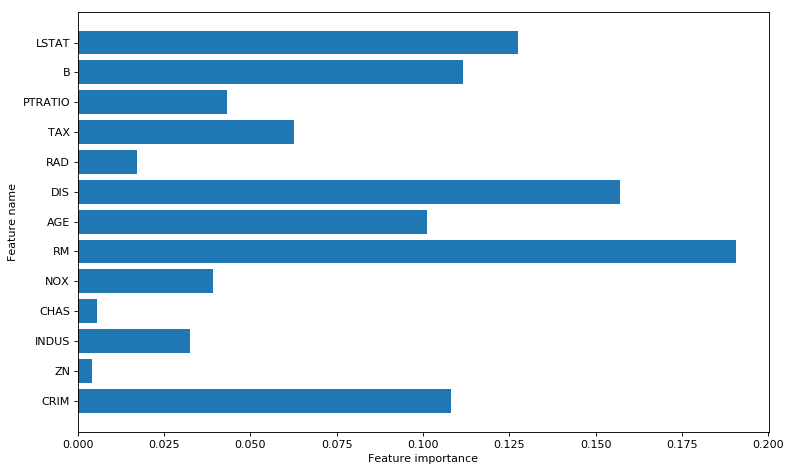

In [153]:
# Fit BOOSTING model

clf = GradientBoostingRegressor(n_estimators=100, random_state=1)
clf.fit(X_train, Y_train)

# Output tree attributes
# print("Out Of Bag imporvement: ", clf.oob_improvement_)
print("Deviance (= loss) of the model at iteration i on the in-bag sample: ", clf.train_score_)
# print("Loss Function: ", clf.loss_ )
# print("Estimator for initial predictions: ", clf.init_ )

# Predict the response on the test set
y_pred = clf.predict(X_test)

# MSE on training set
Y_train_pred = clf.predict(X_train)
print("\nMean squared error on Training set = %.2f" % mean_squared_error(Y_train, Y_train_pred))
print("Root Mean squared error on Training set = %.2f" % np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

# Predict on test set
Y_pred = clf.predict(X_test)
print("Mean squared error on Test set = %.2f" % mean_squared_error(Y_test, Y_pred))
print("Root Mean squared error on Test set = %.2f" % np.sqrt(mean_squared_error(Y_test, Y_pred)))


# Plot the feature importances
feature_importance_df = pd.DataFrame(X.columns)
feature_importance_df['Importance'] =  clf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False)

fig=plt.figure(figsize=(10,6),dpi=80)
fig=plt.barh(X.columns, clf.feature_importances_)
fig=plt.xlabel("Feature importance")
fig=plt.ylabel("Feature name")
fig=plt.yticks(np.arange(len(X.columns)), X.columns)
fig=plt.tight_layout()